In [3]:
import pandas as pd

df =pd.read_csv('bike_usage_0.csv', encoding='CP949')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36595 entries, 0 to 36594
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date_out         36595 non-null  object
 1   Time_out         36595 non-null  int64 
 2   Station_no_out   36595 non-null  int64 
 3   Station_out      36595 non-null  object
 4   Membership_type  36595 non-null  object
 5   Gender           18262 non-null  object
 6   Age_Group        36595 non-null  object
 7   Momentum         36595 non-null  object
 8   Station_no_in    36595 non-null  int64 
 9   Station_in       36595 non-null  object
 10  Date_in          36595 non-null  object
 11  Bike_no          36595 non-null  object
 12  Carbon_amount    36595 non-null  object
 13  Distance         36595 non-null  int64 
 14  Duration         36595 non-null  int64 
dtypes: int64(5), object(10)
memory usage: 4.2+ MB


In [5]:
df.head()

,Date_out,Time_out,Station_no_out,Station_out,Membership_type,Gender,Age_Group,Momentum,Station_no_in,Station_in,Date_in,Bike_no,Carbon_amount,Distance,Duration
0,2019-10-03,0,129,129. 신촌역(2호선) 6번출구 옆,정기권,NaN,~10대,28.27,122,신성기사식당 앞,2019-10-03 오전 12:20:42,SPB-15000,0.24,1050,5
1,2019-10-03,0,150,150. 서강대역 2번출구 앞,정기권,NaN,20대,146.46,2065,서울시여성가족재단,2019-10-03 오전 1:16 2,SPB-13087,1.32,5690,32
2,2019-10-03,0,240,240. 문래역 4번출구 앞,정기권,NaN,20대,37.13,245,삼성생명 당산사옥 앞,2019-10-03 오전 12:18:21,SPB-23229,0.29,1250,10
3,2019-10-03,0,623,623. 서울시립대 정문 앞,정기권,NaN,20대,134.62,1346,길음8골어린이공원 옆,2019-10-03 오전 1:15:39,SPB-14181,1.21,5230,24
4,2019-10-03,0,633,633. 청량리 기업은행 앞,정기권,NaN,20대,85.83,568,청계8가사거리 부근,2019-10-03 오전 12:17:58,SPB-15221,0.67,2890,11


In [6]:
df['Date_in'] = df['Date_in'].str.replace('오전', 'AM').str.replace('오후', 'PM')

# 날짜 형식 변환, Date_in 의 type 을 pandas datetime 클래스로 바꿔줘야함 
df['Date_in'] = pd.to_datetime(df['Date_in'], format='%Y-%m-%d %p %I:%M:%S', errors='coerce')

print(df)
print(type(df['Date_in'].values))  # numpy.ndarray
print(type(df['Date_in'].values[0]))  # numpy.datetime64
print(df['Date_in'].values[0])  # 시계열 데이터 값

         Date_out  Time_out  Station_no_out           Station_out  \
0      2019-10-03         0             129  129. 신촌역(2호선) 6번출구 옆   
1      2019-10-03         0             150      150. 서강대역 2번출구 앞   
2      2019-10-03         0             240       240. 문래역 4번출구 앞   
3      2019-10-03         0             623       623. 서울시립대 정문 앞   
4      2019-10-03         0             633       633. 청량리 기업은행 앞   
...           ...       ...             ...                   ...   
36590  2019-10-05        23             130  130. 신촌역(2호선) 7번출구 앞   
36591  2019-10-05        23            2215      2215. 반포종합운동장 입구   
36592  2019-10-05        23             654         654. 전농동 텃골공원   
36593  2019-10-05        23             119          119. 서강나루 공원   
36594  2019-10-05        23             630         630. 동대문구 보건소   

      Membership_type Gender Age_Group Momentum  Station_no_in    Station_in  \
0                 정기권    NaN      ~10대    28.27            122      신성기사식당 앞   
1          

In [7]:
type(df['Date_in'].values)
type(df['Date_in'].values[0])
df['Date_in'].values[0]

numpy.datetime64('2019-10-03T00:20:42.000000000')

In [8]:
type(df.iloc[0]['Date_in'])

pandas._libs.tslibs.timestamps.Timestamp

In [9]:
df_part = df.iloc[:5]

In [10]:
# 날짜를 내림차순으로 정렬
df = df.sort_values(by='Date_in', ascending=False).reset_index(drop=True)


In [11]:
df.head()

,Date_out,Time_out,Station_no_out,Station_out,Membership_type,Gender,Age_Group,Momentum,Station_no_in,Station_in,Date_in,Bike_no,Carbon_amount,Distance,Duration
0,2019-10-05,23,186,186. 월드컵공원,일일권,NaN,20대,254.47,907,CJ 드림시티,2019-10-06 02:00:47,SPB-04304,2.48,10710,132
1,2019-10-05,23,186,186. 월드컵공원,정기권,NaN,20대,230.87,907,CJ 드림시티,2019-10-06 02:00:18,SPB-04841,2.46,10600,133
2,2019-10-05,23,2220,2220. 반포본동 주민센터 앞,일일권,NaN,20대,127.44,843,녹사평역 광장,2019-10-06 01:48:01,SPB-25144,1.46,6310,131
3,2019-10-05,23,143,143. 공덕역 2번출구,일일권,F,30대,77.43,143,공덕역 2번출구,2019-10-06 01:32:50,SPB-15563,0.97,4160,108
4,2019-10-05,23,437,437. 대흥역 1번출구,일일권,M,20대,346.1,437,대흥역 1번출구,2019-10-06 01:26:17,SPB-25415,2.67,11500,109


In [32]:
import matplotlib.font_manager as fm 
fonts = [f.name for f in fm.fontManager.ttflist ] 
for font in fonts:
    if 'gothic' in font.lower():
        print(font)

Franklin Gothic Medium Cond
Copperplate Gothic Light
Franklin Gothic Demi Cond
Malgun Gothic
Malgun Gothic
Copperplate Gothic Bold
Century Gothic
Yu Gothic
Franklin Gothic Book
Franklin Gothic Medium
Franklin Gothic Heavy
Franklin Gothic Heavy
HYGothic-Medium
Franklin Gothic Book
Yu Gothic
Century Gothic
Century Gothic
Hancom Gothic
Century Gothic
Yu Gothic
Hancom Gothic
HYGothic-Extra
Yu Gothic
Franklin Gothic Demi
MS Gothic
Franklin Gothic Demi
Malgun Gothic
Franklin Gothic Medium
Showcard Gothic


In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rc
## 폰트 깨짐 해결
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False 

<Axes: >

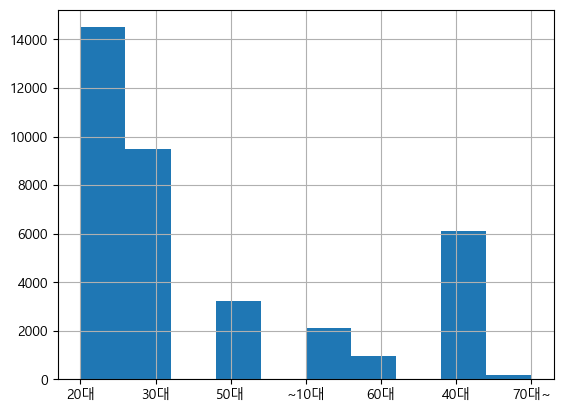

In [34]:
df['Age_Group'].hist()

In [ ]:
# Age_Group의 범주형 데이터 순서 지정
age_categories = ['~10대', '20대', '30대', '40대', '50대', '60대', '70대~']
df['Age_Group'] = pd.Categorical(df['Age_Group'], categories=age_categories, ordered=True)

# 히스토그램 생성
ax = df['Age_Group'].value_counts(sort=False).plot(kind='bar')

In [ ]:
# 예제 데이터 프레임 생성
# data = {'Age_Group': ['a', 'b', 'a', 'c', 'b', 'a']}
# df = pd.DataFrame(data)

# # 매핑 딕셔너리 생성
# category_mapping = {'a': 1, 'b': 2, 'c': 3}

category_mapping = {a:i for i, a in enumerate(age_categories)}
print(category_mapping)

# 범주형 데이터를 숫자형 데이터로 변환, 연령을 그래프로 찍기 위해서 
df['Age_Group'] = df['Age_Group'].map(category_mapping)

In [ ]:
df.plot.scatter(x='Age_Group', y='Distance')

In [ ]:
df['Age_Group'].values

In [ ]:
# 그래프 생성
fig, ax = plt.subplots()

# 카테고리별 데이터 산점도
for category in df['Age_Group'].unique():
    subset = df[df['Age_Group'] == category]
    ax.scatter(subset['Age_Group'], subset['Distance'], label=f'Data points ({category})')


# 카테고리형 데이터 기준으로 그룹바이하여 평균과 표준편차 계산
grouped = df.groupby('Age_Group')['Distance'].agg(['mean', 'std']).reset_index()

# 평균과 표준편차 에러바 추가
ax.errorbar(grouped['Age_Group'], grouped['mean'], yerr=grouped['std'], fmt='o', color='red', label='Mean ± STD')

# 그래프 레이블 설정
ax.set_xlabel('Age_Group')
ax.set_ylabel('Distance')
ax.set_title('Scatter Plot with Mean and Standard Deviation')
ax.legend()

plt.show()

In [ ]:
df.head()

In [ ]:
df['Station_out'].sample(100)

In [ ]:
df2 = pd.read_csv('stations.csv')

In [ ]:
df2.head()

In [ ]:
df3 = pd.read_csv('weather.csv')
df3.head()

# 결측값 처리하고 시작하기

### 해볼 수 있는 것 . 순서대로 풀지 않아도 됨. 팀 별 분석 아이디어 구현이 더 중요


In [ ]:
# 문제 1 
# 연령과 주행 거리의 관계 그래프 
import pandas as pd
import datetime
df =pd.read_csv('bike_usage_0.csv', encoding='CP949', parse_dates=['Date_in','Time_out'])
df['Date_in'] = df['Date_in'].str.replace('오전', 'AM').str.replace('오후', 'PM')
df['Date_in'] = pd.to_datetime(df['Date_in'], format='%Y-%m-%d %p %I:%M:%S', errors='coerce')
df['Time_out'] = df['Date_in']-df['Duration'].apply(pd.offsets.Minute)
df.head()

In [ ]:
# 문제 2 
# 연령별 가장 많이 자전거 빌리는 곳 = 그 연령대 거주지 혹은 핫플레이스


In [ ]:
# 문제 3
# 현재 자전거가 가장 많이 주차되어 있는 곳 

In [ ]:
# 문제 4 
# 출퇴근 시간대에 가장 많이 빌리는 곳. 시간대 오전 8시~9시를 설정해서 풀기 pandas.datetime 클래스 검색해서 사용법 찾기 


In [ ]:
# 문제 5 
# date out 컬럼을 Duration과 date in 시간으로 계산


In [ ]:
# 문제 6 
# 전체 대여건 연령 분포 히스토그램 
# 특정 정거장의 연령 분포 히스토그램 그리기 


In [ ]:
# 문제 7
# 가장 긴 거리 주행한 건의 거리는?
# 가장 긴 누적 주행거리를 가진 자전거 구하기? 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
BIKEdata = pd.read_csv('bike_usage_0.csv', encoding='CP949')
STATIONdata = pd.read_csv('stations.csv')
WEATHERdata = pd.read_csv('weather.csv')

#Membership_type, Gender Age_Group Momentum Station_no_in Station_in Date_in Bike_no Carbon_amount Distance Duration
#Gu ID Station Address Latitude Longitude Date No_of_Racks
#date_old: 날짜 시간 분  date time temp cum_precipitation강수량 humidity 습도 insolation일사량 sunshine 밝기?  wind 바람 
#wind_direction   sealvlpressure

In [ ]:
print(WEATHERdata)

In [ ]:
STATIONdata.loc[:,['Latitude','Longitude']].values.shape

# 지도에 표시 라이브러리 : folium 힌트 코드. 라이브러리 문서에서 사용법 찾기. 

https://python-visualization.github.io/folium/latest/user_guide.html

## 터미널 열어서 현재 가상환경(base)에 folium 설치 
## 터미널(명령 프롬프트, command prompt)에 pip install folium 입력 

In [1]:
import folium
import requests
import pandas as pd
import numpy as np
BIKEdata = pd.read_csv('bike_usage_0.csv', encoding='CP949')
STATIONdata = pd.read_csv('stations.csv')
WEATHERdata = pd.read_csv('weather.csv')

start = '서울대'
end = '서울역'
request = requests.get(f'https://www.google.co.kr/maps/dir/{start}/{end}')
result= request.text.split("markers=")[1].split("&amp")[0].split("%7C")
print(result)
startxy=list(map(float,[result[0].split("%2C")[0],result[0].split("%2C")[1]]))
endxy=list(map(float,[result[1].split("%2C")[0],result[1].split("%2C")[1]]))
print(startxy,endxy)
startpoint = np.array(startxy)
endpoint = np.array(endxy)
dataxy=STATIONdata.loc[:,['Latitude','Longitude']].values
resultstartxy = (abs(dataxy-startpoint))
def reach(a, b):
    x, y=(a-b)[:,0],(a-b)[:,1]
    return ((x)**2+(y)**2)**(1/2)

STATIONdata['distancestart']=reach(startpoint, dataxy)
STATIONdata['distanceend'] = reach(endpoint, dataxy)
print(STATIONdata['Longitude'].between(startpoint[1],endpoint[1])&STATIONdata['Latitude'].between(endpoint[0],startpoint[0])&STATIONdata['distancestart']<=STATIONdata['distancestart'].min())
nearstart = STATIONdata['distancestart'].idxmin()
print(endpoint, startpoint)
nearstart2 = STATIONdata[['Latitude','Longitude']].iloc[nearstart].to_list()
resultendxy = (abs(dataxy-endpoint))
STATIONdata['distanceend'] = (resultendxy[:,0]**2+resultendxy[:,1]**2)**(1/2)
nearend=STATIONdata['distanceend'].idxmin()
nearend2 =STATIONdata[['Latitude','Longitude']].iloc[nearend].to_list()

STATIONdata['Stationdistance']= (STATIONdata['distancestart']+STATIONdata['distanceend'])*3
print('출발지:',STATIONdata.iloc[nearstart],'도착지',STATIONdata.iloc[nearend])
m = folium.Map(width=600, height=400, location= nearstart2, zoom_start=15)
lines =[startxy,nearstart2,nearend2,endxy]
print(type(nearstart2))
print(type(lines))
folium.PolyLine(
    locations = lines,
    tooltip = 'PolyLine'
).add_to(m)
for op in lines:
    print(type(op))
    if op == lines[0]:
    
        h = f'출발지: {start}'
        color='red'
    elif op == lines[1]:
        h = f"가까운 station:{STATIONdata['Station'].iloc[nearstart]}"
        color='blue'
    elif op == lines[2]:
        h = f"도착지에서 가까운 station:{STATIONdata['Station'].iloc[nearend]}"
        color='blue'
    else:
        h =f'도착지: {end}'
        color='green'
    folium.Marker(
        location = op,
        radius = 10,   
        popup= h,
        icon=folium.Icon(color=color,icon='star')
    


        ).add_to(m)


['37.4648267%2C126.9571988', '37.555946%2C126.972317']
[37.4648267, 126.9571988] [37.555946, 126.972317]
0      True
1      True
2      True
3      True
4      True
       ... 
366    True
367    True
368    True
369    True
370    True
Length: 371, dtype: bool
[ 37.555946 126.972317] [ 37.4648267 126.9571988]
출발지: Gu                                  서초구
ID                                 2223
Station                2223. 방배래미안 정문 앞
Address            서울특별시 서초구 남부순환로 2183
Latitude                       37.47261
Longitude                    126.983009
Date                   2017-06-01 10:23
No_of_Racks                          20
distancestart                  0.026958
distanceend                    0.084019
Stationdistance                0.332932
Name: 297, dtype: object 도착지 Gu                                 마포구
ID                                 157
Station               157. 애오개역 4번출구 앞
Address            서울특별시 마포구 아현동 607-1
Latitude                     37.553001
Longitude          

In [2]:
center = [37.541, 126.986] # 지도를 표시할 중심 좌표
m = folium.Map(width=600, height=400, location=center, zoom_start=10)

#
for i in df2.index[:1]: #한줄만 찍기 
    folium.Circle(
        location = df2.loc[i, ['Latitude', 'Longitude']],
        tooltip = df2.loc[i, 'Station'],
        radius = 2000   # 원의 크기
    ).add_to(m)

    print(df2.loc[i]['Station'])
m

NameError: name 'df2' is not defined

In [ ]:
# 문제 8
# 지도에 정거장 위치에 사용자 수에 비례하여 커지는 원 그리기 
# 저녁시간대 Statin In 이 가장 많은 정거장 찾아 지도상에 표시. 퇴근. 거주지역.
# 아침시간대 Statin In 이 가장 많은 정거장 찾아 지도상에 표시. 출근. 업무지역.


In [ ]:
lines =[[37.50140089999999, 127.1586471],
 [37.644936799999996, 127.0737283],
 [37.6403353, 127.0776372],
 [37.645723499999995, 127.02044939999999],
 [37.6597831, 127.0311865]]


center = [37.541, 126.986]
m = folium.Map(width=600, height=400 ,location=center, zoom_start=10)

folium.PolyLine(
    locations = lines,
    tooltip = 'PolyLine'
).add_to(m)

m

In [ ]:
# 문제 9 
# 문제 7 에서 찾은 가장 누적 주행거리가 긴 자전거의 이동경로 지도상에 표시하기.

In [ ]:
# 문제 10
# 남성이 Statin_In 한 정거장을 가장 많은 순으로 3곳 찾아서 지도 상에 표기. 원의 크기가 횟수에 비례하게 

# 각 팀별 분석 아이디어 내기! 
### 이 데이터들을 가지고 계산하거나 시각화 해보면 좋을 것 3개 생각하고 구현해보기. 


# 분석 아이디어 1 : 여기에 작성

# 분석 아이디어 2 : 여기에 작성

# 분석 아이디어 3 : 여기에 작성 